<a href="https://colab.research.google.com/github/Rishika-Ravindran/Natural-language-Processing/blob/main/Bank_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('drive/MyDrive/clean_merged_v4.csv')

In [ ]:
df.head(4)

,Unnamed: 0,web-scraper-order,web-scraper-start-url,comments,title,title-href,username,date,complaint-des,complaint-status,complaint-status-date,response,resolved-status,location,City,State,Comp Name,Title,Company Name,new_complaint_body,complaint_date_changed,Update_date_changed
0,0,1624943926-6488,https://www.consumercomplaints.in/axis-bank-b1...,NaN,Debit Card of Axis Bank —\nIssue New Debit Car...,https://www.consumercomplaints.in/complaints/d...,Debamita Mandal,NaN,Before 2 Years AXIS Bank issued me a internati...,NaN,"Aug 14, 2020",[],[Resolved],NaN,NaN,NaN,Debit Card of Axis Bank —,Issue New Debit Card But OLD Card not deactivated,Debit Card of Axis Bank,Before 2 Years AXIS Bank issued me a internati...,NaN,14-08-2020
1,1,1624945217-6764,https://www.consumercomplaints.in/axis-bank-b1...,NaN,Axis Bank Credit Card —\nCredit card fraud,https://www.consumercomplaints.in/axis-bank-cr...,vinod37,NaN,On 02/09/2014 when i was traveling in train i ...,Axis Bank customer support has been notified a...,"Feb 10, 2016",[],Not Resolved,NaN,NaN,NaN,Axis Bank Credit Card —,Credit card fraud,Axis Bank Credit Card,On 02/09/2014 when i was traveling in train i ...,NaN,02-10-2016
2,2,1624943954-6500,https://www.consumercomplaints.in/axis-bank-b1...,NaN,Axis Bank Credit Card —\nWANT TO CLOSE THIS CR...,https://www.consumercomplaints.in/complaints/a...,TARUN MEHTA,"Jan 23, 2019",AS THEY ARE CHARGING AMOUNT ON THEIR OWN WISH ...,NaN,"Aug 14, 2020",[],[Resolved],NaN,NaN,NaN,Axis Bank Credit Card —,WANT TO CLOSE THIS CREDIT CARD,Axis Bank Credit Card,AS THEY ARE CHARGING AMOUNT ON THEIR OWN WISH ...,23-01-2019,14-08-2020
3,3,1624945602-6877,https://www.consumercomplaints.in/axis-bank-b1...,NaN,Axis Bank —\nCredit card Settlement payment,https://www.consumercomplaints.in/axis-bank-cr...,kavi vicky,"Oct 17, 2018",I am writing this with regards to my credit ca...,Axis Bank customer support has been notified a...,"Nov 18, 2016","[{""response"":""Oct 15, 2016Updated by kavi vick...",[Resolved],NaN,NaN,NaN,Axis Bank —,Credit card Settlement payment,Axis Bank,I am writing this with regards to my credit ca...,17-10-2018,18-11-2016


In [ ]:
%%capture
!pip  install texthero

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import re
import texthero as hero
from texthero import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = df[df["new_complaint_body"].notnull()] #excluding all nulls
df["new_complaint_body"] = df["new_complaint_body"].str.lower() #lower case

In [ ]:
import nltk
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')
stop_words.remove('not') 
stop_words.append('protected')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["new_complaint_body"] = df["new_complaint_body"].str.replace('\d+', '') #digits
df["new_complaint_body"] = df["new_complaint_body"].str.replace('[^\w\s]',' ') #special characters

In [ ]:
#Stop words removal
df["new_complaint_body"] = df["new_complaint_body"].apply(lambda words: ' '.join(word for word in words.split() if word not in stop_words))

In [ ]:
df["new_complaint_body"][0]

'years axis bank issued international debit card account showing rs deducted tip scg visa pos dt'

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def stem_text(text):
    result = []
    docs = [snowBallStemmer.stem(w) for w in w_tokenizer.tokenize(text)]
    for word in docs:
        result.append(word)
    return " ".join(result)

df['cleaned_complaints'] = df["new_complaint_body"].apply(stem_text) #DBT

In [ ]:
df['cleaned_complaints'][0]

'year axi bank issu intern debit card account show rs deduct tip scg visa pos dt'

In [ ]:
df_grouped=df[['title','cleaned_complaints']].groupby(by='title').agg(lambda x:' '.join(x))
df_grouped.head()

,cleaned_complaints
title,
"A retired State Bank of India official and now a pensioner —\nIT Refund of Rs.12,386 for the AY-2007-08 not received till date",hyderabad n manohara rao dt retir chief manag ...
"ADB State Bank of India, Chharra Aligarh —\nArrear of sixth pay comission not credited in my account no.30486671052.D A didn't released w.e.f 01-04-2009 till date",sir bring kind notic account branch code state...
ADFC Pvt Ltd C/O HDFC Bank Bank —\nFalse Commitment and fraud with adfc agents,rushvi ahmedabad phonebank divis adfc employe ...
ADFC Pvt Ltd C/O HDFC Bank Bank —\nworking on National holidays and Sundays regularly get only 1 vacation in a month.,work adfc pvt ltd hdfc bank risk control unit ...
ATM Counter Axis Bank Haridwar Road Rishikesh —\ndefective transection,custom pnb india yamuna coloni dehra dun save ...


In [ ]:
df_grouped.columns

Index(['cleaned_complaints'], dtype='object')

In [ ]:
df_grouped.cleaned_complaints[4]

'custom pnb india yamuna coloni dehra dun save c transect withdraw rs said atm hrs atm nt give cash enter slip issu success transact matter report manageri person axi bank rishikesh sharp person nt entertain applic behav rude lodg matter pnb yamuna coloni dehra dun report matter pnb dun offic grevanc cell customar care pnb dun custom care axi bank request kind look matter arrang need return rs save c reff'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word', min_df=.0040, ngram_range = (1,2))
data = cv.fit_transform(df_grouped['cleaned_complaints'])
df_mat = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_mat.index = df_grouped.index
df_mat.head(15)

,aadhar,aadhar card,aap,abl,abl pay,absolut,abus,abus languag,ac,acc,accept,access,accord,account,account account,account activ,account alreadi,account also,account amount,account ask,account axi,account balanc,account bank,account branch,account call,account charg,account close,account contact,account credit,account custom,account date,account day,account debit,account deduct,account detail,account due,account even,account get,account got,account hdfc,...,work day,world,worri,worst,worst bank,worst servic,worth,worth rs,would,would like,would not,would request,write,write email,written,written complaint,wrong,wrong inform,wrote,www,xx,xxxx,xxxx xxxx,yadav,yahoo,yahoo co,yahoo com,year,year ago,year back,year not,year old,yes,yesterday,yet,yet not,yet receiv,yrs,zero,zero balanc
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"A retired State Bank of India official and now a pensioner —\nIT Refund of Rs.12,386 for the AY-2007-08 not received till date",0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"ADB State Bank of India, Chharra Aligarh —\nArrear of sixth pay comission not credited in my account no.30486671052.D A didn't released w.e.f 01-04-2009 till date",0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ADFC Pvt Ltd C/O HDFC Bank Bank —\nFalse Commitment and fraud with adfc agents,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ADFC Pvt Ltd C/O HDFC Bank Bank —\nworking on National holidays and Sundays regularly get only 1 vacation in a month.,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ATM Counter Axis Bank Haridwar Road Rishikesh —\ndefective transection,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ATM Of ICICI —\nwrong balance,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ATM Of ICICIBranch —\nwrong debit entry,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ATM PNB Bank —\nAMOUNT DEBITED WITHOUT RECEIVING CASH THROUGH PNB ATM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ATM Pin From HDFC Bank Bank —\nNot informing client and returning it,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cvec = CountVectorizer(min_df=.0040, stop_words='english', ngram_range=(1,2))
cvec.fit(df['cleaned_complaints'])
len(cvec.vocabulary_)

2252

All terms that occur in less than 0.4% documents have been discarded, it could be names of people, etc.
and we are left with quite less words after this

In [ ]:
cvec_counts = cvec.transform(df['cleaned_complaints'])

occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,term,occurrences
204,bank,137702
13,account,101800
351,card,77573
1756,rs,51760
564,credit,48822
579,custom,42109
318,branch,40600
983,icici,39061
1485,pleas,38338
914,hdfc,35292


#### If we don't discard anything

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_complaints'])

In [ ]:
len(tfidf_vectorizer.vocabulary_)

1254409

#### So there are huge number of words after applying bigrams as well
#### Let's apply the same parameters as the count vectorizer to reduce it

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer(min_df=.0040, stop_words='english', ngram_range=(1,2))
tfidf_matrix1 = tfidf_vectorizer1.fit_transform(df['cleaned_complaints'])
len(tfidf_vectorizer1.vocabulary_)

2252

In [ ]:
print((tfidf_vectorizer1.vocabulary_))

{'year': 2244, 'axi': 190, 'bank': 204, 'issu': 1057, 'intern': 1045, 'debit': 623, 'card': 351, 'account': 13, 'rs': 1756, 'deduct': 636, 'visa': 2172, 'pos': 1529, 'dt': 710, 'axi bank': 191, 'bank issu': 231, 'debit card': 625, 'card account': 352, 'account rs': 49, 'rs deduct': 1766, 'travel': 2102, 'train': 2077, 'got': 875, 'sms': 1911, 'transact': 2078, 'execut': 768, 'immedi': 1004, 'block': 305, 'mean': 1233, 'time': 2039, 'complet': 512, 'procedur': 1560, 'file': 813, 'complaint': 504, 'submiss': 1961, 'disput': 684, 'form': 834, 'requir': 1720, 'accord': 12, 'given': 867, 'credit': 564, 'approx': 144, 'revers': 1745, 'month': 1292, 'januari': 1070, 'statement': 1944, 'communic': 500, 'receiv': 1617, 'settl': 1865, 'favour': 801, 'merchant': 1246, 'signatur': 1884, 'mention': 1244, 'kumar': 1110, 'instead': 1036, 'differ': 669, 'alway': 106, 'sign': 1883, 'mishra': 1262, 'charg': 425, 'slip': 1909, 'miss': 1263, 'request': 1708, 'guid': 895, 'process': 1562, 'thank': 2018, 'g

In [ ]:
print(tfidf_matrix1)

  (0, 1766)	0.25593924191992773
  (0, 49)	0.30146256640181845
  (0, 352)	0.2834755329233904
  (0, 625)	0.20772669568605187
  (0, 231)	0.34360073080417924
  (0, 191)	0.18891420180043864
  (0, 710)	0.29559376726833164
  (0, 1529)	0.32508946290829493
  (0, 2172)	0.3260755213203855
  (0, 636)	0.15503360174768577
  (0, 1756)	0.11518734351689347
  (0, 13)	0.09068048464505964
  (0, 351)	0.11457868722615389
  (0, 623)	0.14686429397777187
  (0, 1045)	0.30386645895051007
  (0, 1057)	0.15608172785674843
  (0, 204)	0.08105760676750957
  (0, 190)	0.18335153641517715
  (0, 2244)	0.17281264244351877
  (1, 271)	0.14251101490824064
  (1, 2080)	0.14251101490824064
  (1, 2091)	0.11386876261773009
  (1, 1618)	0.1361182372980154
  (1, 570)	0.1368833812069256
  (1, 225)	0.13642118927922758
  :	:
  (68890, 1444)	0.03665383950636299
  (68890, 1464)	0.07791880793501707
  (68890, 2091)	0.06612246481835327
  (68890, 359)	0.06848590359393895
  (68890, 274)	0.07330817285492322
  (68890, 883)	0.07830635094152551
  

In [ ]:
from itertools import islice
list(islice(cvec.vocabulary_.items(), 25))

[('year', 2244),
 ('axi', 190),
 ('bank', 204),
 ('issu', 1057),
 ('intern', 1045),
 ('debit', 623),
 ('card', 351),
 ('account', 13),
 ('rs', 1756),
 ('deduct', 636),
 ('visa', 2172),
 ('pos', 1529),
 ('dt', 710),
 ('axi bank', 191),
 ('bank issu', 231),
 ('debit card', 625),
 ('card account', 352),
 ('account rs', 49),
 ('rs deduct', 1766),
 ('travel', 2102),
 ('train', 2077),
 ('got', 875),
 ('sms', 1911),
 ('transact', 2078),
 ('execut', 768)]

### You can set ngram_range accordingly

In [ ]:
tfidf_vectorizer1 = TfidfVectorizer(min_df=.0040, stop_words='english', ngram_range=(1,2))
tfidf_matrix1 = tfidf_vectorizer1.fit_transform(df['cleaned_complaints'])
len(tfidf_vectorizer1.vocabulary_)

2252

In [ ]:
weights = np.asarray(tfidf_matrix1.mean(axis=0)).flatten().tolist()
weights_df = pd.DataFrame({'Term': tfidf_vectorizer1.get_feature_names(), 'Avg_weight': weights})
weights_df.sort_values(by='Avg_weight', ascending=False).head(20)

,Term,Avg_weight
204,bank,0.060875
13,account,0.058231
351,card,0.051296
1756,rs,0.035214
564,credit,0.034834
983,icici,0.030077
318,branch,0.029972
914,hdfc,0.029109
568,credit card,0.028557
425,charg,0.028355


In [ ]:
weights1 = np.asarray(tfidf_matrix1.sum(axis=0)).flatten().tolist()
weights_df1 = pd.DataFrame({'Term': tfidf_vectorizer1.get_feature_names(), 'Sum_weight': weights1})
weights_df1.sort_values(by='Sum_weight', ascending=False).head(20)

,Term,Sum_weight
204,bank,4193.755117
13,account,4011.585545
351,card,3533.820898
1756,rs,2425.894281
564,credit,2399.757111
983,icici,2072.006763
318,branch,2064.780427
914,hdfc,2005.345079
568,credit card,1967.286303
425,charg,1953.437348


In [ ]:
tfidf_matrix1

<68891x2252 sparse matrix of type '<class 'numpy.float64'>'
	with 3146000 stored elements in Compressed Sparse Row format>

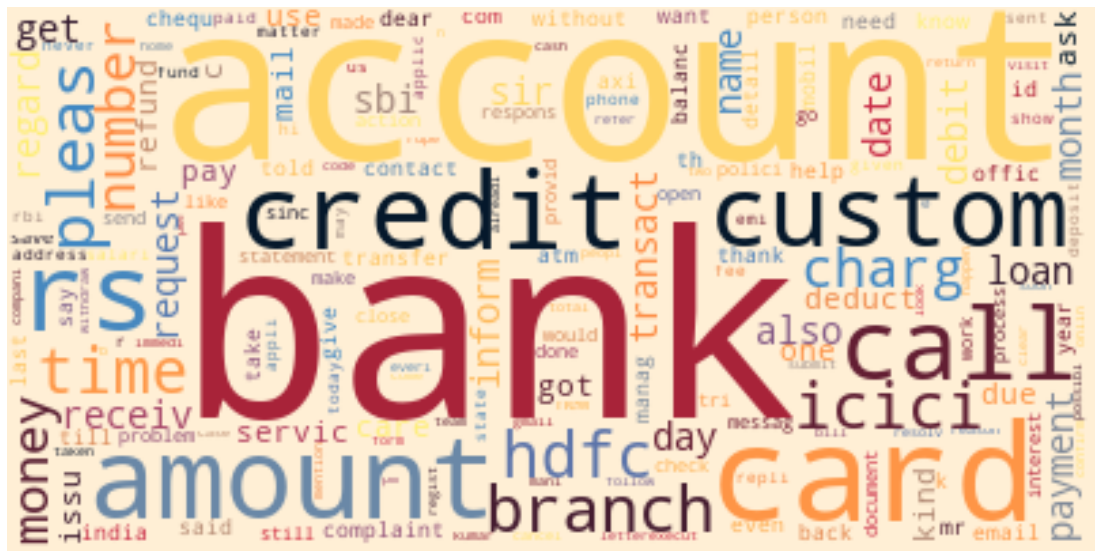

In [ ]:
import texthero as hero
hero.wordcloud(df['cleaned_complaints'].pipe(hero.clean))